In [1]:
%reload_ext autoreload
%autoreload 2

%matplotlib notebook

In [5]:
%matplotlib inline
import matplotlib
# matplotlib.use('WXAgg')
from spsa.spsa import Parameters, SPSA, rho, cond_num
import numpy as np
import matplotlib.pyplot as plt

import plotly.graph_objects as go
import plotly

import time


Version: 0.1.3


In [6]:
%matplotlib notebook

In [7]:
par = Parameters()

par.n = 5  # number of sensors
par.N = {i for i in range(1, par.n + 1)}  # indexes of sensors
par.s = {1: np.array([1, 2]),  # sensors coordinates
         2: np.array([3, 20]),
         3: np.array([10, 3]),
         4: np.array([20, 3]),
         5: np.array([3, 10])}
par.s_norms = {i: sum(val * val) for i, val in par.s.items()}

par.m = 1  # nuber of targets
par.M = {i for i in range(1, par.m + 1)}  # targets indexes
par.r = {1: np.array([40, 40])}  # targets coordinates
par.theta = np.array([val for key, val in par.r.items()])  # searching for

par.meas = {1: {
    1: rho(par.r.get(1), par.s.get(1)),  # measurments  from target to sensor
    2: rho(par.r.get(1), par.s.get(2)),
    3: rho(par.r.get(1), par.s.get(3)),
    4: rho(par.r.get(1), par.s.get(4)),
    5: rho(par.r.get(1), par.s.get(5))
}
}

par.init_coord = np.array([5, 5])  # r estimations

par.d = 2  # number of dimensions

par.beta_1 = 0.5
par.beta_2 = 0.5
par.beta = par.beta_1 + par.beta_2

par.alpha = 1 / 4
par.gamma = 1 / 4

par.weight = np.array([[3., -1., -1., -1., 0.],
                       [-1., 3., 0., -1., -1.],
                       [-1., 0., 1., 0., 0.],
                       [-1., -1., 0., 3., -1.],
                       [0., -1., 0., -1., 2.]])

par.b = 1

In [8]:
def generate_matrix(n):
    raw_mat = np.random.rand(n, n)
    weight = np.tril(raw_mat) + np.tril(raw_mat, -1).T

    weight = np.around(weight, 1)
    np.fill_diagonal(weight, 0)
    weight = - weight + np.diag([n-1]*n)
    return weight


par.weight = generate_matrix(5)
cond = cond_num(par.weight)
max_c = 0
while max_c < 5:
    par.weight = generate_matrix(5)
    if cond_num(par.weight) > max_c:
        max_c = cond_num(par.weight)
        w = par.weight

# cond_num(par.weight), par.weight

max_c, w

(5.771967622151904,
 array([[ 4. , -0.8, -0.6, -0.8, -0.4],
        [-0.8,  4. , -0.9, -1. , -1. ],
        [-0.6, -0.9,  4. , -0.6, -0.8],
        [-0.8, -1. , -0.6,  4. , -0.8],
        [-0.4, -1. , -0.8, -0.8,  4. ]]))



Main method

Previous condition number: 5.771967622151904
 New condition number: 5.771967622151904


<IPython.core.display.Javascript object>


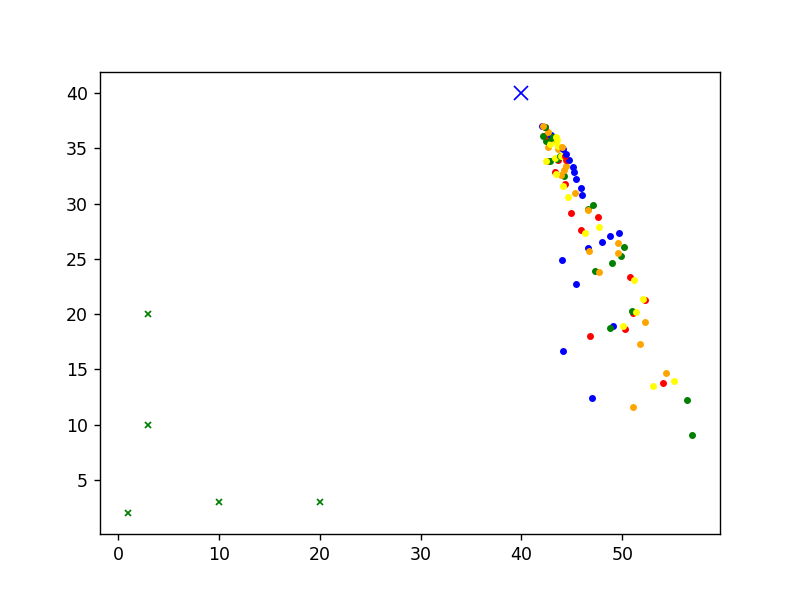

Error - 1248.28 on 1 step
Error - 967.38 on 2 step
Error - 662.59 on 3 step
Error - 437.84 on 4 step
Error - 358.01 on 5 step
Error - 223.36 on 6 step
Error - 159.67 on 7 step
Error - 101.40 on 8 step
Error - 75.96 on 9 step
Error - 67.62 on 10 step
Error - 60.47 on 11 step
Error - 49.66 on 12 step
Error - 26.51 on 13 step
Error - 17.06 on 14 step
Error - 12.57 on 15 step
Error - 9.50 on 16 step
Error - 5.01 on 17 step
Error - 3.47 on 18 step
Error - 3.24 on 19 step


In [9]:
# ["blue", "red", "green", "orange", "yellow"]


def K(u):
    coef1 = 1 if u[0] > 0 else -1
    coef2 = 1 if u[1] > 0 else -1
    return np.array([1 / 4, 1 / 4])


spsa = SPSA(**par.__dict__)

print("\n\nMain method\n")
spsa_main = spsa.run("main")

<IPython.core.display.Javascript object>


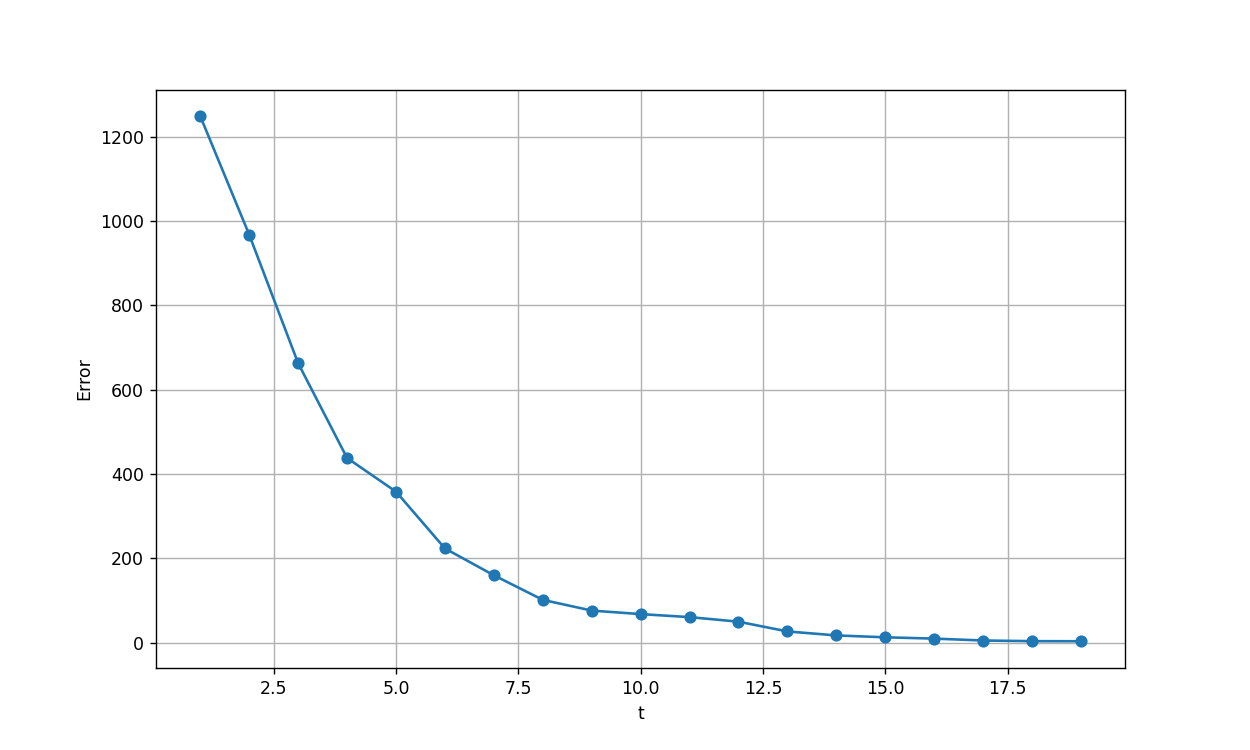

In [11]:
import matplotlib.pyplot as plt

# Assuming that spsa.errors contains errors for the iterations
errors = spsa.errors

# we can retrieve the list of iterations and their corresponding errors
iterations = list(errors.keys())
error_values = list(errors.values())

plt.figure(figsize=(10, 6))
plt.plot(iterations, error_values, marker='o', linestyle='-')
plt.xlabel('t')
plt.ylabel('Error')
plt.grid(True)
plt.show()